<a href="https://colab.research.google.com/github/gowtham66866/Inkers/blob/master/Gowtham_6A_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D,Conv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

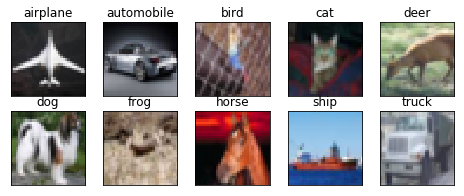

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [7]:
from keras import regularizers
weight_decay = 0.005
    
model = Sequential()


# 1st convolution block
model.add(Convolution2D(32, (3, 3), padding='same',
                         input_shape=[32,32,3],kernel_regularizer=regularizers.l2(weight_decay))) #32
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Convolution2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))) #32
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Convolution2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))) #32
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# 1st transition block with bottlneck
model.add(MaxPooling2D(pool_size=(2, 2)))   #16
model.add(Convolution2D(32, 1, 1, activation='relu'))


# 2nd convolution block
model.add(Convolution2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))  #16
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Convolution2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))  #16
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# 2nd transition block with bottlneck
model.add(MaxPooling2D(pool_size=(2, 2)))  #8
model.add(Convolution2D(64, 1, 1, activation='relu'))

# 3rd convolution block
model.add(Convolution2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))  #8
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Convolution2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))  #8
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Convolution2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))   #18
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# 3rd transition block with bottlneck
model.add(MaxPooling2D(pool_size=(2, 2)))   #4
model.add(Convolution2D(64, 1, 1, activation='relu'))

# 4th convolution block
model.add(Convolution2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))) #4
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Convolution2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))#4
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# 4th transition block with bottlneck
model.add(MaxPooling2D(pool_size=(2, 2))) #2
model.add(Convolution2D(64, 1, 1, activation='relu'))


# 5th convolution block
model.add(Convolution2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))  #2
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Convolution2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))  #2
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# 5th transition block with bottlneck
model.add(MaxPooling2D(pool_size=(2, 2)))   #1
model.add(Convolution2D(64, 1, 1, activation='relu'))

# final convolution block
model.add(Convolution2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))  #1
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Convolution2D(10, (3, 3), padding='same'))


model.add(Flatten())

model.add(Activation('softmax'))
model.summary()

W0615 19:14:38.726987 139893941909376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0615 19:14:38.741684 139893941909376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0615 19:14:38.744056 139893941909376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0615 19:14:38.774431 139893941909376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0615 19:14:38.775199 1398939419

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
__________

In [8]:
from keras.optimizers import adam
adam = adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-8,decay=0.005)
model.compile(loss='categorical_crossentropy',
             optimizer=adam,
             metrics=['accuracy'])

W0615 19:14:41.565394 139893941909376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':
W0615 19:14:41.846255 139893941909376 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and wil

Epoch 1/100
390/390 [==============================] - 75s 191ms/step - loss: 5.6707 - acc: 0.2165 - val_loss: 3.0156 - val_acc: 0.1001
Epoch 2/100
390/390 [==============================] - 78s 201ms/step - loss: 2.3161 - acc: 0.2833 - val_loss: 2.8937 - val_acc: 0.1114
Epoch 3/100
390/390 [==============================] - 74s 189ms/step - loss: 2.0830 - acc: 0.3434 - val_loss: 2.4324 - val_acc: 0.1932
Epoch 4/100
390/390 [==============================] - 75s 193ms/step - loss: 1.9319 - acc: 0.4138 - val_loss: 2.3350 - val_acc: 0.2120
Epoch 5/100
390/390 [==============================] - 75s 193ms/step - loss: 1.8069 - acc: 0.4862 - val_loss: 2.3561 - val_acc: 0.2837
Epoch 6/100
390/390 [==============================] - 75s 193ms/step - loss: 1.6931 - acc: 0.5451 - val_loss: 2.3106 - val_acc: 0.2672
Epoch 7/100
390/390 [==============================] - 75s 192ms/step - loss: 1.5651 - acc: 0.6020 - val_loss: 2.5329 - val_acc: 0.2145
Epoch 8/100
390/390 [===========================

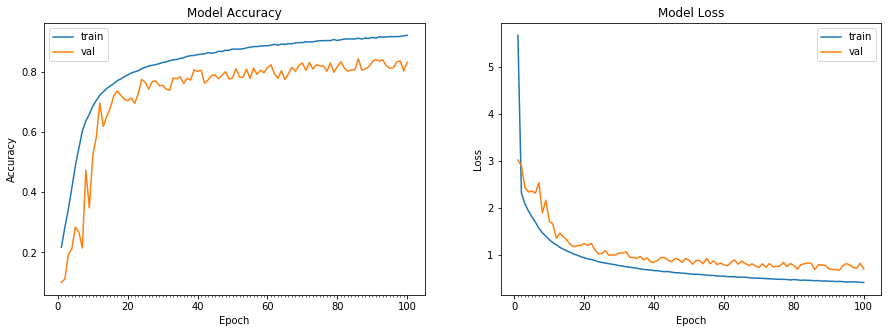

Accuracy on test data is: 83.08


In [9]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

 Following techniques has been used in the below model:



*   1x1 convolution after max pooling for bottleneck layer
*   Regularization with proper Dropout and L2 regulariser.


*   Convolution blocks has been used and transition blocks back to back for parameter efficiency and for efficient flow of important features through the network.
*   Only maxpooling has been  for reducing feature map channel dimentions, all the 3x3 convolution layers are with "same" padding, meaning the input and output feature map channel dimentions are the same.
*   Fully connected layers at the end has been removed, convolutions layers throughout has been used, followed by Flatted layer and softmax of 10 activations
*   BatchNormalisation at every convolution layer has been applied, this improves convergence and also contributes to regularization.










On the side of each Convolution layer and Maxpool layer, I have specified channel dimentions in comments. By the time we reach last convolution layer we have the channel width and height(dimentions) to be one, and depth of 10(for 10 classes).


Since I have used BatchNorm layer at every convoulution layer, we need not be very careful with Learning Rate. It can vary in the bigger range and we can use large values for Learning Rate. For this reason I have used a learning rate of 0.01, considered a big value for a learning rate.

After training the network for 100 epoch, validation acc  is 85.78% and a training acc of 91.15%. Which is an improvement on the baseline of val_acc: 83.08

With out using the bottleneck layers 1x1 convolutions, I was able to get a validation accuracy of 89%. I will have to further investigate reasons for this, I think the reasons for poor accuracy in the given network could be the folloing:


*   too much regularization with lot of regularisation methods L2, BN, Dropout etc.
*   1x1 convolution is reducing the number of parameters and not sufficient to train the model, and added to this there are too many regularization methods used.

